In [88]:
from numpy import copy, empty, arange, linspace, exp, real,zeros,diagflat,dot,sqrt
#from visual import curve, display, rate
from pylab import plot, show


In [2]:


def banded(Aa,va,up,down):

    # Copy the inputs and determine the size of the system
    A = copy(Aa)
    v = copy(va)
    N = len(v)

    # Gaussian elimination
    for m in range(N):

        # Normalization factor
        div = A[up,m]

        # Update the vector first
        v[m] /= div
        for k in range(1,down+1):
            if m+k<N:
                v[m+k] -= A[up+k,m]*v[m]

        # Now normalize the pivot row of A and subtract from lower ones
        for i in range(up):
            j = m + up - i
            if j<N:
                A[i,j] /= div
                for k in range(1,down+1):
                    A[i+k,j] -= A[up+k,m]*A[i,j]

    # Backsubstitution
    for m in range(N-2,-1,-1):
        for i in range(up):
            j = m + up - i
            if j<N:
                v[m] -= A[i,j]*v[j]

    return v

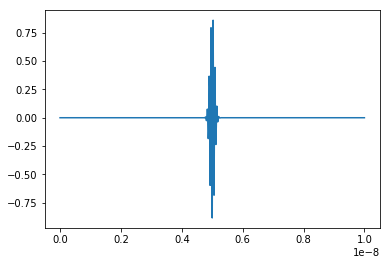

In [96]:
L=1e-8
N=1000
a=L/N
m=9.109e-31
hbar=1.055e-34
x0=L/2
sigma=1e-10
kappa=5e10

tmax=1.0e-16
yscale=1e-9
framerate=100
h=1e-17

C=1j*hbar/(4*m*a*a)
a1=1+2*h*C
a2=-h*C
b1=1-2*h*C
b2=h*C

x=linspace(0,L,N+1)
psi=exp(-(x-x0)**2/(2*sigma**2))*exp(1j*kappa*x)
psi[0]=0
psi[N]=0
plot(x,psi*psi)
show()

In [100]:
A=empty([3,N-1],complex)
A = diagflat([a2 for i in range(N)],1)+diagflat([a2 for i in range(N)],-1)+diagflat(a1)
B= diagflat([b2 for i in range(N)],1)+diagflat([b2 for i in range(N)],-1)+diagflat(b1)
len(dot(B,psi))

1001

In [98]:
psi=exp(-(x-x0)**2/(2*sigma**2))*exp(1j*kappa*x)
psi[0]=0
psi[N]=0
for i in arange(0,tmax,h):
    v=dot(B,psi)
    psi[1:N]=banded(A,v,1,1)
    
plot(x,1e-9*sqrt(psi*psi))
show()
    

ValueError: could not broadcast input array from shape (1001) into shape (999)

In [86]:
print(psi)

[-2.45114515e+19+1.66190851e+19j  1.84467441e+19-9.22337204e+18j
  3.57623612e+18-3.14157087e+18j -6.43381465e+18+1.13739392e+19j
  3.58067793e+17-3.93395449e+18j -4.90358112e+17+1.80922660e+18j
 -2.36106057e+18+6.40779071e+18j  3.56570799e+17-3.92681048e+18j
 -4.88917796e+17+1.79359376e+18j -2.36100555e+18+6.41625651e+18j
  3.55077723e+17-3.91963117e+18j -4.87480316e+17+1.77795943e+18j
 -2.36095163e+18+6.42468849e+18j  3.53588560e+17-3.91241660e+18j
 -4.86045649e+17+1.76232371e+18j -2.36089880e+18+6.43308663e+18j
  3.52103304e+17-3.90516683e+18j -4.84613771e+17+1.74668668e+18j
 -2.36084710e+18+6.44145085e+18j  3.50621948e+17-3.89788191e+18j
 -4.83184656e+17+1.73104845e+18j -2.36079654e+18+6.44978112e+18j
  3.49144487e+17-3.89056187e+18j -4.81758280e+17+1.71540913e+18j
 -2.36074714e+18+6.45807738e+18j  3.47670913e+17-3.88320677e+18j
 -4.80334619e+17+1.69976879e+18j -2.36069892e+18+6.46633958e+18j
  3.46201222e+17-3.87581666e+18j -4.78913649e+17+1.68412756e+18j
 -2.36065189e+18+6.474567

In [ ]:
plot(x,psi*psi)
show()

In [42]:
# Constants
L = 0.01      # Thickness of steel in meters
D = 4.25e-6   # Thermal diffusivity
N = 5    # Number of divisions in grid
a = L/N       # Grid spacing
h = 1e-4      # Time-step
epsilon = h/1000

Tlo = 0.0     # Low temperature in Celcius
Tmid = 20.0   # Intermediate temperature in Celcius
Thi = 50.0    # Hi temperature in Celcius

C=D/(a*a)
a1=1+2*h*C
a2=-h*C
b1=1-2*h*C
b2=h*C
A=zeros([3,N-1],float)
A[0,:]=a2
A[1,:]=a1
A[2,:]=a2
print(A)


[[-1.0625000e-04 -1.0625000e-04 -1.0625000e-04 -1.0625000e-04]
 [ 1.0002125e+00  1.0002125e+00  1.0002125e+00  1.0002125e+00]
 [-1.0625000e-04 -1.0625000e-04 -1.0625000e-04 -1.0625000e-04]]


In [50]:
A = diagflat([a2 for i in range(N-1)],1)+diagflat([a2 for i in range(N-1)],-1)+diagflat(a1)
print(A)

[[1.0002125  1.00010625 1.0002125  1.0002125  1.0002125 ]
 [1.00010625 1.0002125  1.00010625 1.0002125  1.0002125 ]
 [1.0002125  1.00010625 1.0002125  1.00010625 1.0002125 ]
 [1.0002125  1.0002125  1.00010625 1.0002125  1.00010625]
 [1.0002125  1.0002125  1.0002125  1.00010625 1.0002125 ]]
